# **Ονοματεπώνυμο: ΘΕΟΦΑΝΟΠΟΥΛΟΣ ΜΙΧΑΗΛ**

# **Αριθμός Μητρώου: 111 520 18 00 053**

**1η Εργασία Τεχνικές Εξόρυξης Δεδομένων**

**Τα κομμάτια κώδικα εκτελέσθηκαν με ένα υποσύνολο του dataframe (8000 entries) για λόγους χρόνου. Τα αποτελέσματα θα είναι καλύτερα και πιο ακριβή με ολόκληρο το dataframe.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


First we import the libraries required for the execution of our program.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import numpy as np
e = np.ones((3,3),np.float64)
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn import svm
from nltk.tokenize import TweetTokenizer
import nltk
from gensim.models import CoherenceModel
from __future__ import print_function
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from bs4 import BeautifulSoup
import nltk
from multiprocessing import Pool
from sklearn.feature_extraction.text import CountVectorizer
import os
import time
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score, f1_score
warnings.filterwarnings('ignore')

Then we install 'nltk' and 'pyLDAvis' also required for the execution of our program.

In [ ]:
!nltk.download('all')
!pip install pyLDAvis

We read the pickle file and store data to df2 variable.

In [137]:
df2 = pd.read_pickle('/content/drive/MyDrive/eclass_all_with_sentiment_v2.pkl')
df2 = df2.filter(['text','sentiment','date'])


We split the dataset into two dataframes (training set 80% and testing set 20%).

In [138]:
training_set, testing_set = train_test_split(df2,test_size=0.2)

The following two lists represent the stop words and emojis that we need in order to remove it from the twitter texts.

In [139]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)

The following is a function used to clean a tweet. There is a comment next to every action.

In [140]:
def clean(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # remove mentions
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # remove hashtags
    temp = re.sub(r'http\S+', '', temp) # remove links
    temp = re.sub(r"www.\S+", "", temp) # remove links
    temp = re.sub('[()!?]', ' ', temp) # remove punctuations (shmeia stixhs)
    temp = re.sub('\[.*?\]',' ', temp) # remove punctuations (shmeia stixhs)
    temp = re.sub("[^a-z0-9]"," ", temp) # remove non-alphanumeric characters
    temp = temp.split() # split text
    temp = [w for w in temp if not w in stopwords] # remove stopwords
    temp = " ".join(word for word in temp) # re-create text
    emoji_pattern.sub(r'', temp) # remove emojis and emoticons
    return temp


The following is my implementation for the ***first requirement*** of the exercise.

In [141]:
dummy_list = []

text_column = df2.iloc[:,0]
for value in text_column.values:
  value = clean(value)
  dummy_list.append(value)

df2['text'] = dummy_list

The following class is used in order to represent the total sentiments of any kind of representation we may need. For every class object there is a counter for all positive,neutral and negative sentiments.

In [142]:
class Sentiments:
  positives = 0
  neutrals = 0
  negatives = 0
  def __init__(self):
    self.positives = 0
    self.neutrals = 0
    self.negatives = 0

  def positiveAdd(self):
    self.positives = self.positives +1
  def neutralAdd(self):
    self.neutrals = self.neutrals +1
  def negativeAdd(self):
    self.negatives = self.negatives +1  

The following are my implementations for the ***second requirement*** of the exercise.

**Question 1:**

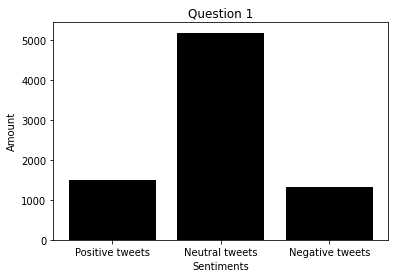

In [143]:
tweets = Sentiments()

sentiment_column = df2.iloc[:,1]
for value in sentiment_column.values:
  if(value == "POS"):
    tweets.positiveAdd()
  elif(value == "NEU"):
    tweets.neutralAdd()
  else:
    tweets.negativeAdd()  

height = [tweets.positives,tweets.neutrals,tweets.negatives]
bars = ('Positive tweets','Neutral tweets','Negative tweets')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height,color = "black")  

plt.title('Question 1')
plt.xlabel('Sentiments')
plt.ylabel('Amount')

plt.xticks(x_pos,bars)
plt.show()

In [144]:
def myFunction(e):
  return e[1]

The following is a function that return a directory of the most common n words in a frame given, and the amount of times they are found in the frame.

In [145]:
def common_n_words(frame,n):

  words = {}

  for value in frame:
    splited = value.split()
    for word in splited:
      if(word in words):
        words[word] = words[word]+1
      else:
        words[word] = 1 
  words = list(words.items())
  words.sort(reverse=True,key=myFunction)
  words = words[0:n]  

  return words      

**Question 2:**

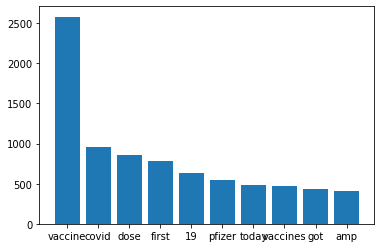

In [146]:
words = common_n_words(text_column,10)

plt.bar(*zip(*words))
plt.show()

**Question 3:**

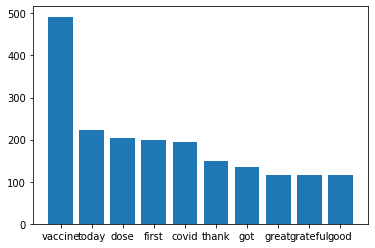

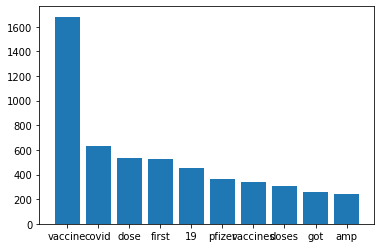

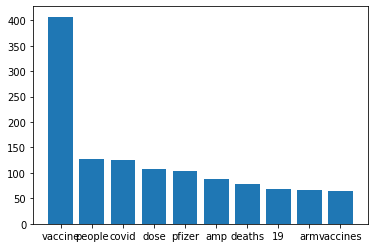

In [147]:
positive_tweets = []
neutral_tweets = []
negative_tweets = []

index = 0

text_list = text_column.values.tolist()

for value in sentiment_column.values:
  if(value == "POS"):
    positive_tweets.append(text_list[index])
  elif(value == "NEU"):
    neutral_tweets.append(text_list[index])
  else:
    negative_tweets.append(text_list[index]) 

  index=index+1  

n_positive = common_n_words(positive_tweets,10)

plt.bar(*zip(*n_positive))
plt.show()

n_neutral = common_n_words(neutral_tweets,10)

plt.bar(*zip(*n_neutral))
plt.show()

n_negative = common_n_words(negative_tweets,10)

plt.bar(*zip(*n_negative))
plt.show()

**Question 4:**

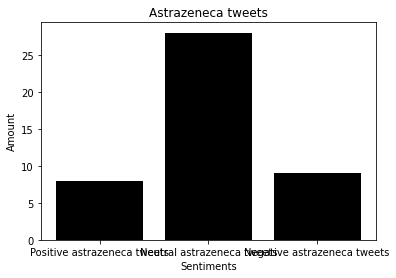

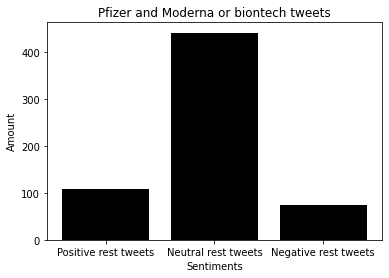

In [148]:
index = 0

astra_Object = Sentiments()
rest_Object = Sentiments()

for value in text_column:
  if('astrazeneca' in value):
    if(sentiment_column[index] == "POS"):
      astra_Object.positiveAdd()
    elif(sentiment_column[index] == "NEU"):
      astra_Object.neutralAdd()
    else:
      astra_Object.negativeAdd()
  elif(('moderna' in value) or ('biontech' in value) or ('pfizer' in value)):
    if(sentiment_column[index] == "POS"):
      rest_Object.positiveAdd()
    elif(sentiment_column[index] == "NEU"):
      rest_Object.neutralAdd()
    else:
      rest_Object.negativeAdd()            

    index = index +1

height = [astra_Object.positives,astra_Object.neutrals,astra_Object.negatives]
bars = ('Positive astrazeneca tweets','Neutral astrazeneca tweets','Negative astrazeneca tweets')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height,color = "black")  

plt.title('Astrazeneca tweets')
plt.xlabel('Sentiments')
plt.ylabel('Amount')

plt.xticks(x_pos,bars)
plt.show()

height = [rest_Object.positives,rest_Object.neutrals,rest_Object.negatives]
bars = ('Positive rest tweets','Neutral rest tweets','Negative rest tweets')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height,color = "black")  

plt.title('Pfizer and Moderna or biontech tweets')
plt.xlabel('Sentiments')
plt.ylabel('Amount')

plt.xticks(x_pos,bars)
plt.show()


**Question 5:**

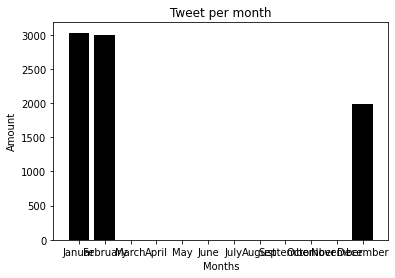

In [149]:
date_column = df2.iloc[:,2]

months = {1 : 0,2 : 0,3 : 0,4 : 0,5 : 0,6 : 0,7 : 0,8 : 0,9 : 0,10 : 0,11 : 0,12 : 0}

for value in date_column:
  date = datetime.fromisoformat(value)
  months[date.month] = months[date.month] + 1

height = [months[1],months[2],months[3],months[4],months[5],months[6],months[7],months[8],months[9],months[10],months[11],months[12]]
bars = ('Januar','February','March','April','May','June','July','August','September','Octomber','November','December')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height,color = "black")  

plt.title('Tweet per month')
plt.xlabel('Months')
plt.ylabel('Amount')

plt.xticks(x_pos,bars)
plt.show()

**Question 6:**

Calculation of positive and negative tweets by month:

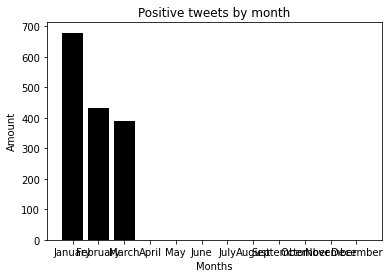

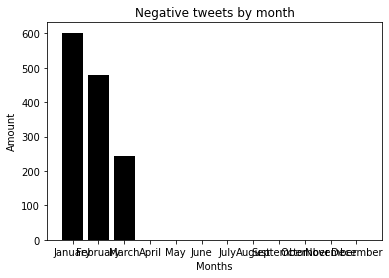

In [150]:
positive_dict = {1 : 0,2 : 0,3 : 0,4 : 0,5 : 0,6 : 0,7 : 0,8 : 0,9 : 0,10 : 0,11 : 0,12 : 0}
negative_dict = {1 : 0,2 : 0,3 : 0,4 : 0,5 : 0,6 : 0,7 : 0,8 : 0,9 : 0,10 : 0,11 : 0,12 : 0}

index = 0

for value in sentiment_column:
  if(value == "POS"):
    date = datetime.fromisoformat(date_column[index])
    positive_dict[date.month] = positive_dict[date.month]+1
  elif(value == "NEG"):
    date = datetime.fromisoformat(date_column[index])
    negative_dict[date.month] = negative_dict[date.month]+1
  index = index +1

positive_dict = list(positive_dict.items())
positive_dict.sort(reverse=True,key=myFunction)

dummy_list = []
for i in range (0,12):
  dummy_list.append(myFunction(positive_dict[i]))

height = [dummy_list[0],dummy_list[1],dummy_list[2],dummy_list[3],dummy_list[4],dummy_list[5],dummy_list[6],dummy_list[7],dummy_list[8],dummy_list[9],dummy_list[10],dummy_list[11]]
bars = ('January','February','March','April','May','June','July','August','September','Octomber','November','December')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height,color = "black")  

plt.title('Positive tweets by month')
plt.xlabel('Months')
plt.ylabel('Amount')

plt.xticks(x_pos,bars)
plt.show()

negative_dict = list(negative_dict.items())
negative_dict.sort(reverse=True,key=myFunction)

dummy_list.clear()
for i in range (0,12):
  dummy_list.append(myFunction(negative_dict[i]))

height = [dummy_list[0],dummy_list[1],dummy_list[2],dummy_list[3],dummy_list[4],dummy_list[5],dummy_list[6],dummy_list[7],dummy_list[8],dummy_list[9],dummy_list[10],dummy_list[11]]
bars = ('January','February','March','April','May','June','July','August','September','Octomber','November','December')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height,color = "black")  

plt.title('Negative tweets by month')
plt.xlabel('Months')
plt.ylabel('Amount')

plt.xticks(x_pos,bars)
plt.show()


Calculation of Positive,Neutral,Negative tweets also by month shown on the same chart.

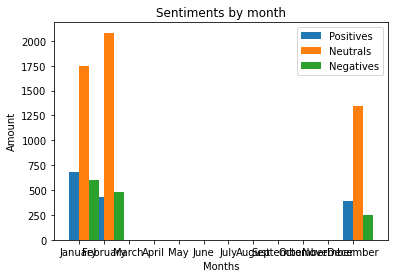

In [151]:
s = []
for i in range(0,12):
  s.append(Sentiments())

month_tweets = {1 : s[0], 2 : s[1], 3 : s[2], 4 : s[3], 5 : s[4], 6 : s[5], 7 : s[6], 8 : s[7], 9 : s[8], 10 : s[9], 11 : s[10], 12 : s[11]}

index = 0

for value in sentiment_column:
  date = datetime.fromisoformat(date_column[index])
  # print(date)
  if(value == "POS"):
    month_tweets[date.month].positiveAdd()
  elif(value == "NEU"):
    month_tweets[date.month].neutralAdd()
  else:
    month_tweets[date.month].negativeAdd()    
  index = index+1

X = ['January','February','March','April','May','June','July','August','September','Octomber','November','December']  
Ypositives = [month_tweets[1].positives,month_tweets[2].positives,month_tweets[3].positives,month_tweets[4].positives,month_tweets[5].positives,month_tweets[6].positives,month_tweets[7].positives,month_tweets[8].positives,month_tweets[9].positives,month_tweets[10].positives,month_tweets[11].positives,month_tweets[12].positives]
Yneutrals = [month_tweets[1].neutrals,month_tweets[2].neutrals,month_tweets[3].neutrals,month_tweets[4].neutrals,month_tweets[5].neutrals,month_tweets[6].neutrals,month_tweets[7].neutrals,month_tweets[8].neutrals,month_tweets[9].neutrals,month_tweets[10].neutrals,month_tweets[11].neutrals,month_tweets[12].neutrals]
Ynegatives = [month_tweets[1].negatives,month_tweets[2].negatives,month_tweets[3].negatives,month_tweets[4].negatives,month_tweets[5].negatives,month_tweets[6].negatives,month_tweets[7].negatives,month_tweets[8].negatives,month_tweets[9].negatives,month_tweets[10].negatives,month_tweets[11].negatives,month_tweets[12].negatives]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,Ypositives,0.4,label='Positives')
plt.bar(X_axis + 0.2,Yneutrals,0.4,label='Neutrals')
plt.bar(X_axis + 0.6,Ynegatives,0.4,label='Negatives')

plt.xticks(X_axis,X)
plt.xlabel("Months")
plt.ylabel("Amount")
plt.title("Sentiments by month")
plt.legend()
plt.show()

The following are my implementations for the ***third requirement*** of the exercise.

Vectorizer used for bag of words.

In [152]:
bow_vectorizer = CountVectorizer(max_features=1000)

Vectorizer used for Tf-idf.

In [153]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

The following is my implementation for the bag of words algorithm.

In [154]:
def Bag_of_Words(array):
  bow_xtrain = bow_vectorizer.fit_transform(array)

  return bow_xtrain

Function used for bag of words test's transform before prediction.

In [155]:
def Bag_of_Words_test(array):
  bow_xtest = bow_vectorizer.transform(array)

  return bow_xtest

The following is my implementation for the Tf_idf algorithm.

In [156]:
def Tf_idf(array):
  tfidf = tfidf_vectorizer.fit_transform(array)

  return tfidf

Function used for Tf_idf test's transform before prediction.

In [157]:
def Tf_idf_test(array):
  tfidf = tfidf_vectorizer.transform(array)

  return tfidf

Here we read a pre-trained model used for Word-Embeddings algorithm.

In [158]:
model = pd.read_csv("/content/drive/MyDrive/glove.twitter.27B.100d.txt",sep=' ',index_col=0,header=None)

The following is my implementation for the Word Embeddings algorithm.

In [159]:
def Word_Embeddings(array):
  tokenizer = TweetTokenizer() # we tokenize the tweet.
  global_array = [] # we use an array to insert every word array that we compute.
  for data in array:
    tokenized_tweet = tokenizer.tokenize(data) # we tokenize the data
    length = len(tokenized_tweet)
    word_array = np.zeros(1)
    for word in tokenized_tweet: # if data exists in pre-trained model
      if word in model.index:
        word_array = np.add(word_array,model.loc[word].to_numpy()) # then add it to the word array
    word_array = np.true_divide(word_array,length) # divide it with the length of the tweet              
    global_array.append(word_array) # and appane it in the global array
  return np.array(global_array)

The following are my implementations for the ***fourth requirement*** of the exercise.

In [160]:
def lemmatization(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [161]:
def stop_word_removal(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatization(token))
    return result

We map all data after Tokenization,Stop Word removal, Lemmatization and Stemming in a dictionary.

In [162]:
processed_set = training_set['text'].map(stop_word_removal)

dictionary = gensim.corpora.Dictionary(processed_set)

Then apply the bag of words algorithm.

In [163]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_set]

We compute the conherence value for topics in range 10-100 in order to find the topic ammount with the best score.

In [164]:
topics = [10,20,30,40,50,60,70,80,90,100]
scores = []
for topic in topics:
  lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=topic, id2word=dictionary, passes=2, workers=2)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_set, dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  scores.append(coherence_lda)

And then visualize the result in a graph.

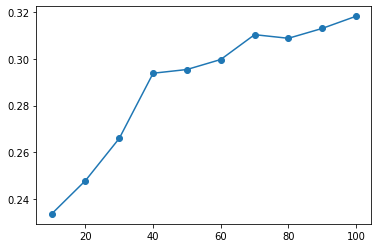

In [165]:
score_df = pd.DataFrame({
    'x_axis':topics,
    'y_axis':scores
})  

plt.plot('x_axis','y_axis',data=score_df,linestyle='-',marker='o')
plt.show()

And finally use pyLDAvis in order to visualize the data more.

In [166]:
vis = gensimvis.prepare(topic_model=lda_model, 
                              corpus=bow_corpus, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

The following are my implementations for the ***fifth requirement*** of the exercise.

The following function cleans every text in an array given as argument.

In [167]:
def Cleaner(array):
  dummy = []
  for text in array:
    text = clean(text)
    dummy.append(text)
  return dummy

The following is my implementation for KNN using Bag of Words

In [168]:
knn = KNeighborsClassifier(n_neighbors = 3)

bow_train_sent = training_set['sentiment']
bow_train_text = training_set['text']
bow_train = Bag_of_Words(bow_train_text)

knn.fit(bow_train, bow_train_sent )

bow_test = testing_set['text']

bow_test = Bag_of_Words_test(bow_test)
predict = knn.predict(bow_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))


Precision: 0.7964649296648845
Recall: 0.643125
F-Measure: 0.698037962601926
Accuracy: 0.643125


The following is my implementation for KNN using Tf-idf.

In [169]:
knn = KNeighborsClassifier(n_neighbors = 3)

tf_train_sent = training_set['sentiment']
tf_train_text = training_set['text']
tf_train = Tf_idf(tf_train_text)

knn.fit(tf_train, tf_train_sent )

tf_test = testing_set['text']

tf_test = Tf_idf_test(tf_test)
predict = knn.predict(tf_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 0.7169168229096915
Recall: 0.680625
F-Measure: 0.6933800670953313
Accuracy: 0.680625


The following is my implementation for KNN using Word Embeddings.

In [170]:
knn = KNeighborsClassifier(n_neighbors = 3)

w2v_train_sent = training_set['sentiment']
w2v_train_text = training_set['text']
w2v_train = Word_Embeddings(w2v_train_text)

knn.fit(tf_train,w2v_train_sent)

w2v_test = testing_set['text']

w2v_test = Tf_idf(w2v_test)
predict = knn.predict(w2v_test.toarray())

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 0.5784627113573226
Recall: 0.51125
F-Measure: 0.5405989627301743
Accuracy: 0.51125


The following is my implementation for Random Forests using Bag of Words.

In [171]:
forest = RandomForestClassifier() 

bow_train_sent = training_set['sentiment']
bow_train_text = training_set['text']
bow_train = Bag_of_Words(bow_train_text)

forest.fit(bow_train, bow_train_sent )

bow_test = testing_set['text']

bow_test = Bag_of_Words_test(bow_test)
predict = forest.predict(bow_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 0.8544206957192845
Recall: 0.764375
F-Measure: 0.7922834282188821
Accuracy: 0.764375


The following is my implementation for Random Forests using Tf-idf.

In [172]:
forest = RandomForestClassifier() 

tf_train_sent = training_set['sentiment']
tf_train_text = training_set['text']
tf_train = Tf_idf(tf_train_text)

forest.fit(tf_train, tf_train_sent )

tf_test = testing_set['text']

tf_test = Tf_idf_test(tf_test)
predict = forest.predict(tf_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 0.864269917444448
Recall: 0.763125
F-Measure: 0.7935863044765756
Accuracy: 0.763125


The following is my implementation for Random Forests using Word Embeddings.

In [173]:
forest = RandomForestClassifier() 

w2v_train_sent = training_set['sentiment']
w2v_train_text = training_set['text']
w2v_train = Word_Embeddings(w2v_train_text)

forest.fit(tf_train,w2v_train_sent)

w2v_test = testing_set['text']

w2v_test = Tf_idf(w2v_test)
predict = forest.predict(w2v_test.toarray())

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 0.5457622041255027
Recall: 0.50125
F-Measure: 0.5181798769713442
Accuracy: 0.50125


We initialize the model that we will use for the SVM calculations.

In [174]:
from sklearn.svm import SVC

svm = SVC(gamma='auto',C=10)

The following is my implementation for SVM using Bag of Words.

In [175]:
bow_train_sent = training_set['sentiment']
bow_train_text = training_set['text']
bow_train = Bag_of_Words(bow_train_text)

svm.fit(bow_train, bow_train_sent )

bow_test = testing_set['text']

bow_test = Bag_of_Words_test(bow_test)
predict = svm.predict(bow_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 0.9112691688336085
Recall: 0.71625
F-Measure: 0.780401629607369
Accuracy: 0.71625


The following is my implementation for SVM using Tf-idf.

In [176]:
tf_train_sent = training_set['sentiment']
tf_train_text = training_set['text']
tf_train = Tf_idf(tf_train_text)

svm.fit(tf_train, tf_train_sent )

tf_test = testing_set['text']

tf_test = Tf_idf_test(tf_test)
predict = svm.predict(tf_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 1.0
Recall: 0.64125
F-Measure: 0.7814166031987814
Accuracy: 0.64125


The following is my implementation for SVM using Word Embeddings.

In [177]:
w2v_train_sent = training_set['sentiment']
w2v_train_text = training_set['text']
w2v_train = Word_Embeddings(w2v_train_text)

svm.fit(tf_train,w2v_train_sent)

w2v_test = testing_set['text']

w2v_test = Tf_idf(w2v_test)
predict = svm.predict(w2v_test)

print ('Precision:', precision_score(predict, testing_set['sentiment'],average='weighted'))
print ('Recall:', recall_score(predict, testing_set['sentiment'],average='weighted'))
print ('F-Measure:', f1_score(predict, testing_set['sentiment'],average='weighted'))
print ('Accuracy:', accuracy_score(predict, testing_set['sentiment']))

Precision: 1.0
Recall: 0.64125
F-Measure: 0.7814166031987814
Accuracy: 0.64125


1. We can clearly see that the SVM algorithm, 
even though it takes more time than the other two, produces better scores. That is because SVM is mainly used for problems that are in a highly dimencional space.
2. kNN on the other hand produces also better scores than the Random Forests algorithm, because it is mainly used in case of large number of training examples.
3. Random Forests produces the worst scores of the other two but with better speed.